In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import imageio


In [9]:
# 1. Cargar datos
X_tr = np.load("../Datasets_DeepShadows/array_images/X_train.npy")
X_val = np.load("../Datasets_DeepShadows/array_images/X_val.npy")
X_test = np.load("../Datasets_DeepShadows/array_images/X_test.npy")

y_tr = np.load("../Datasets_DeepShadows/Galaxies_data/y_train.npy")
y_val = np.load("../Datasets_DeepShadows/Galaxies_data/y_val.npy")
y_test = np.load("../Datasets_DeepShadows/Galaxies_data/y_test.npy")

In [10]:
# 2. Verificar tamaños y ajustar longitudes
def verify_and_align(X, y, name):
    min_len = min(len(X), len(y))
    X = X[:min_len]
    y = y[:min_len]
    print(f"{name}: X={len(X)}, y={len(y)}")
    return X, y

In [11]:
X_tr, y_tr = verify_and_align(X_tr, y_tr, "Training")
X_val, y_val = verify_and_align(X_val, y_val, "Validation")
X_test, y_test = verify_and_align(X_test, y_test, "Test")

Training: X=29580, y=29580
Validation: X=4990, y=4990
Test: X=4983, y=4983


In [12]:
# 3. Convertir etiquetas a enteros y verificar distribución
y_tr = y_tr.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

In [13]:
def check_distribution(y, name):
    unique, counts = np.unique(y, return_counts=True)
    print(f"{name} - Distribución: {dict(zip(unique, counts))}")


In [14]:
check_distribution(y_tr, "Training")
check_distribution(y_val, "Validation")
check_distribution(y_test, "Test")

Training - Distribución: {0: 14164, 1: 15416}
Validation - Distribución: {0: 2356, 1: 2634}
Test - Distribución: {0: 2307, 1: 2676}


In [15]:
# 4. Separar imágenes por clase
def split_by_class(X, y):
    return X[y == 1], X[y == 0]  # Galaxias, Artefactos

X_pos_tr, X_neg_tr = split_by_class(X_tr, y_tr)
X_pos_val, X_neg_val = split_by_class(X_val, y_val)
X_pos_test, X_neg_test = split_by_class(X_test, y_test)


In [16]:
# 5. Visualizar ejemplos
def plot_samples(images, title, save_path=None):
    n_rows, n_cols = 4, 5
    plt.figure(figsize=(n_cols*2.5, n_rows*2.5))
    
    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    plt.show()

In [17]:
# Muestrear y visualizar ejemplos
num_samples = 20
randind_tr_pos = np.random.randint(0, len(X_pos_tr), num_samples)
randind_tr_neg = np.random.randint(0, len(X_neg_tr), num_samples)

Visualizando ejemplos de entrenamiento...


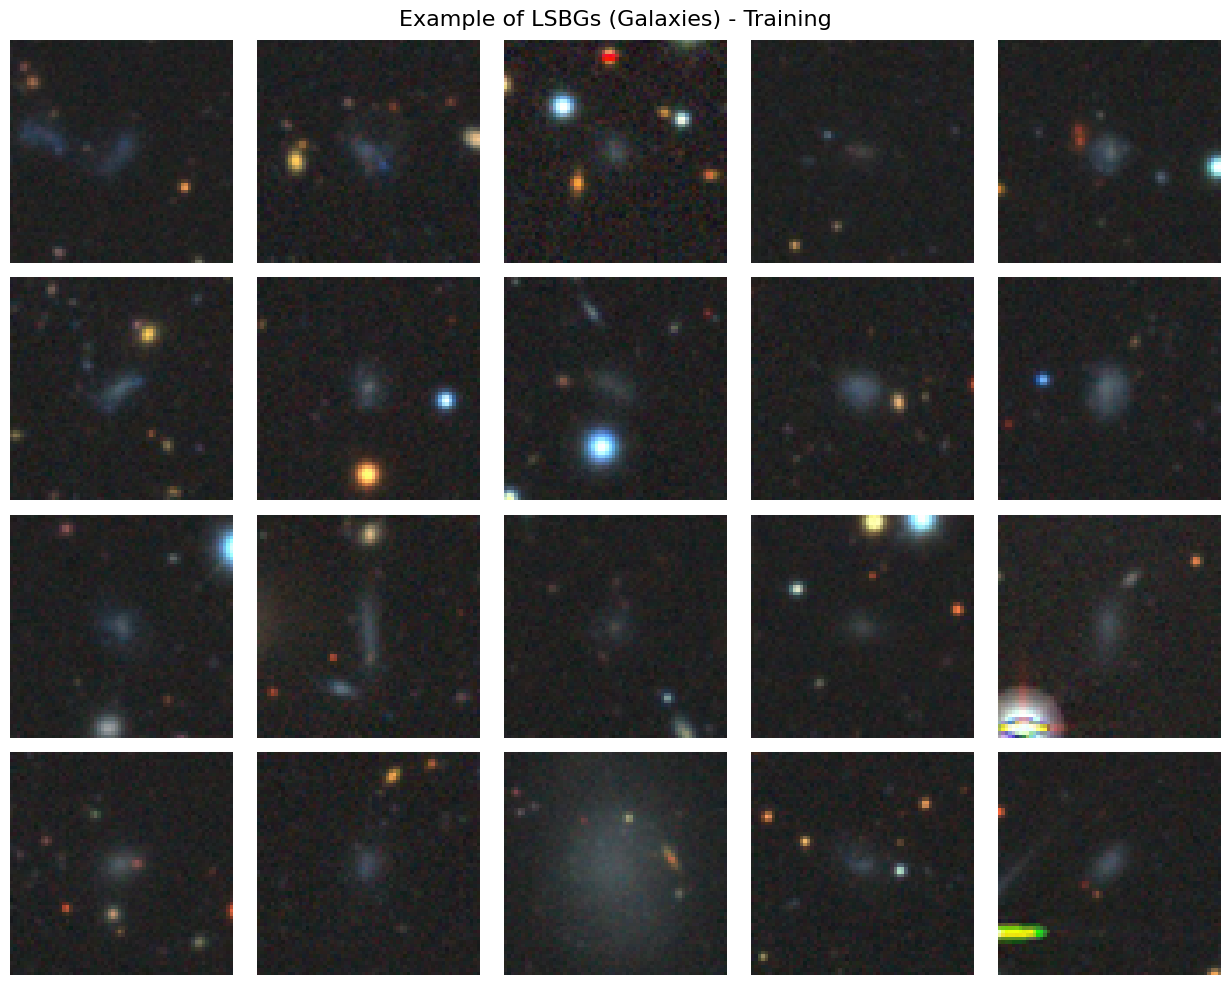

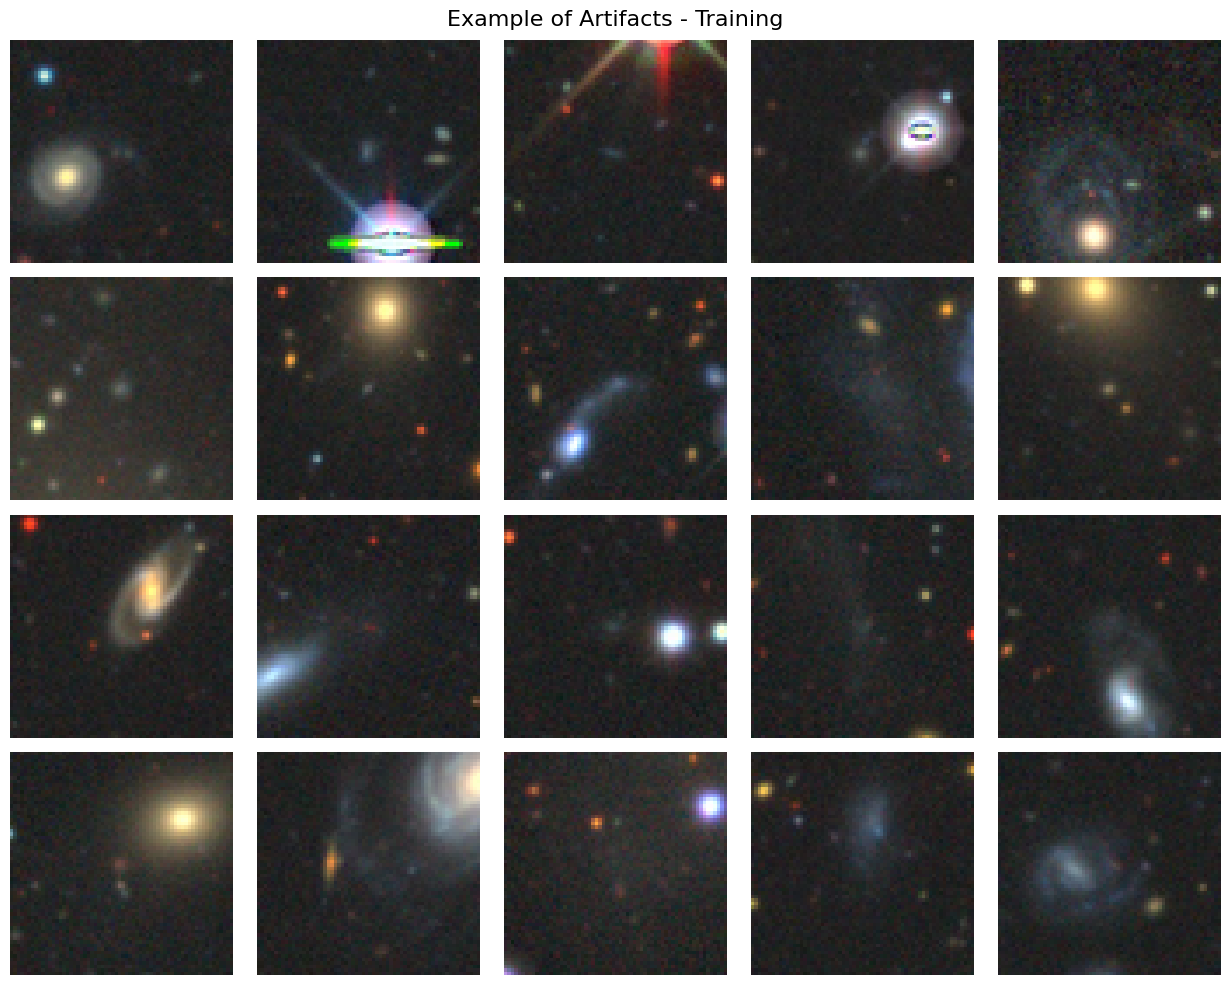

In [18]:
print("Visualizando ejemplos de entrenamiento...")
plot_samples(X_pos_tr[randind_tr_pos], "Example of LSBGs (Galaxies) - Training",
             "../Plots/LSBG_Examples_train.png")
plot_samples(X_neg_tr[randind_tr_neg], "Example of Artifacts - Training",
             "../Plots/Artifacts_Examples_train.png")

In [61]:
# Opcional: Guardar ejemplos como imágenes individuales
def save_individual_samples(images, prefix, output_dir="../Samples/"):
    os.makedirs(output_dir, exist_ok=True)
    for i, img in enumerate(images):
        imageio.imwrite(f"{output_dir}/{prefix}_{i}.png", (img * 255).astype(np.uint8))